In [1]:
!pip install -q -q -q geopandas
!pip install -q -q -q btbpy
!pip install -q -q -q descartes
!pip install -q -q -q mapclassify

In [160]:
import numpy as np

import pandas as pd
import geopandas as gpd
import btbpy
from shapely.geometry import Polygon
import pyproj

from sklearn.neighbors import KDTree
from sklearn.neighbors import RadiusNeighborsRegressor

Filosofi2015_french_grid is a population-grid dataset. Each row represents a grid cell which the side is 200 m. 

In [3]:
df = pd.read_csv('Filosofi2015_french_grid.zip', compression='zip')
df.head(3)

In [10]:
list_of_radius=np.array([400,800, 1600,3200])

In [93]:
neighbors = np.zeros([df.shape[0],list_of_radius.size],dtype=np.float)
for i, r in enumerate(list_of_radius):
    temp = tree.query_radius(df[['x', 'y']], r= r, count_only=True)
    neigh = RadiusNeighborsRegressor(radius=r)
    neigh.fit(df[['x', 'y']],  df.Ind)
    neighbors[:,i] = tree.query_radius(df[['x', 'y']], r= r, count_only=True) * neigh.predict(df[['x', 'y']])

In [104]:
toto = pd.DataFrame(neighbors)
toto.columns = list_of_radius.astype(str)

In [108]:
res = pd.concat([df[['x', 'y']], toto], axis=1)

In [109]:
res.head()

,x,y,400,800,1600,3200
0,3763200,2893400,17469.0,48946.5,168583.5,688245.5
1,3762200,2890000,18336.0,72510.5,272923.5,891664.0
2,3762400,2893400,8212.0,59530.5,180530.5,754562.0
3,3763600,2891800,14545.0,66759.0,268882.5,821605.5
4,3763200,2890800,23431.0,86522.0,294591.0,913469.0


In [107]:
toto.head()

,400,800,1600,3200
0,17469.0,48946.5,168583.5,688245.5
1,18336.0,72510.5,272923.5,891664.0
2,8212.0,59530.5,180530.5,754562.0
3,14545.0,66759.0,268882.5,821605.5
4,23431.0,86522.0,294591.0,913469.0


In [103]:
neighbors.shape

(2289077, 4)

In [70]:
temp = tree.query_radius(df[['x', 'y']], r= 400, count_only=True)
neigh = RadiusNeighborsRegressor(radius=400)
neigh.fit(df[['x', 'y']],  df.Ind)
toto = neigh.predict(df[['x', 'y']])

In [72]:
toto * temp

array([1.7469e+04, 1.8336e+04, 8.2120e+03, ..., 1.0950e+02, 1.5450e+02,
       1.8000e+01])

In [8]:
neighbors = np.zeros((df.shape[0],radius.size),dtype=np.float)

In [11]:
radius = list_of_radius[0]

In [12]:
tree = KDTree(df[['x', 'y']])

In [71]:
temp2 = tree.query_radius(df[['x', 'y']], r= 400, count_only=False)

In [80]:
df.Ind[temp2[-3]].sum()

109.5

In [44]:
toto =  [df.Ind[indices] for indices in temp[:100000]]

In [59]:
neigh.fit(df[['x', 'y']],  df.Ind)

RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=None, p=2, radius=200,
                         weights='uniform')

In [60]:
toto = neigh.predict(df[['x', 'y']])

In [62]:
toto2 = neigh.radius_neighbors(df[['x', 'y']], return_distance=False)

In [67]:
toto * temp

array([2.01780000e+04, 1.93830000e+04, 7.94887500e+03, ...,
       1.03000000e+02, 9.58333333e+01, 1.65000000e+01])

In [48]:
db = DBSCAN(eps=200, min_samples=10).fit(df[['x', 'y']], sample_weight=df.Ind)

In [50]:
dir(db)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 'algorithm',
 'components_',
 'core_sample_indices_',
 'eps',
 'fit',
 'fit_predict',
 'get_params',
 'labels_',
 'leaf_size',
 'metric',
 'metric_params',
 'min_samples',
 'n_jobs',
 'p',
 'set_params']

In [55]:
db.n_jobs

In [24]:
result

[2, 4, 6, 8]

In [16]:
neighbors=np.zeros((df.shape[0],radius.size),dtype=np.float)
tree = KDTree(df[['x', 'y']])
for i in range(radius.size):
    neighbors[:,i]=tree.query_radius(df[['x', 'y']],r= radius[i],count_only=True,return_distance=False)
    output=np.column_stack([df[['x', 'y']],neighbors])
    names=np.hstack([['x','y'], np.core.defchararray.add('r_',np.char.mod('%d', radius))])
    output=pd.DataFrame(output,columns=names)

In [149]:
scale_function = btbpy.kernelSmoothing(res, '3035', 2000, 25000, verbose=False)

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [150]:
scale_function['D'] = np.log(scale_function['3200']) - np.log(scale_function['1600']) 

In [151]:
from sklearn.linear_model import LinearRegression

In [152]:
D = scale_function[list_of_radius.astype(str)].apply(lambda x :LinearRegression().fit(np.log(list_of_radius).reshape(4,1), np.log(x)).coef_[0] ,   axis=1 ) 

In [126]:
scale_function['D'] = D

In [127]:
D

0         1.309576
1         1.314727
2         1.318117
3         1.320282
4         1.321561
            ...   
147533    1.464733
147534    1.451395
147535    1.438654
147536    1.434544
147537    1.438845
Length: 147538, dtype: float64

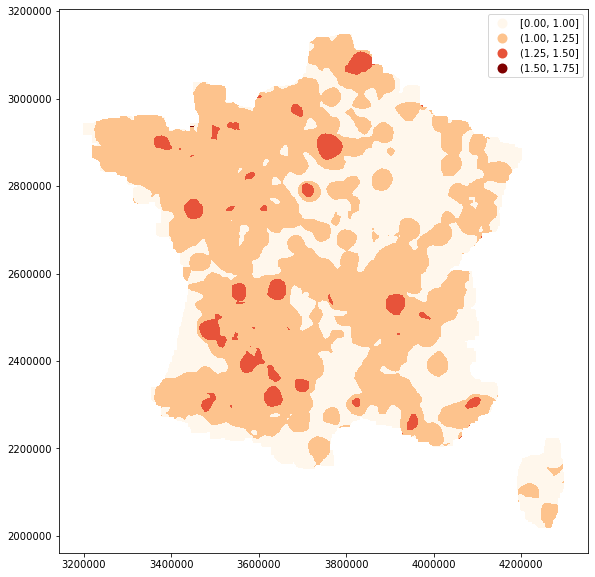

In [153]:
bins = [1, 1.25, 1.5, 1.75]
scale_function.plot('D', scheme = 'User_Defined', classification_kwds={'bins':bins}, figsize=(10,10), legend=True, cmap='OrRd')

In [157]:
res2 = res.copy()
res2[list_of_radius.astype(str)] = res2[list_of_radius.astype(str)]**(-1) 
scale_function2 = btbpy.kernelSmoothing(res2, '3035', 2000, 20000, verbose=False)

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [158]:
scale_function2['D'] = scale_function2[list_of_radius.astype(str)].apply(lambda x :-LinearRegression().fit(np.log(list_of_radius).reshape(4,1), np.log(x)).coef_[0] ,   axis=1 ) 

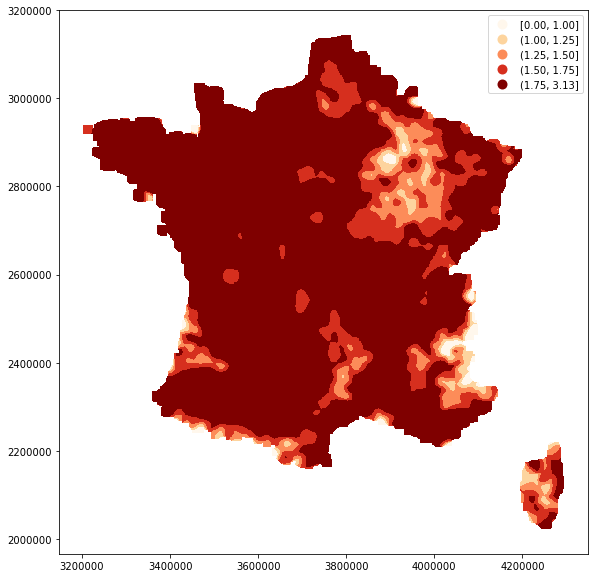

In [159]:
bins = [1, 1.25, 1.5, 1.75]
scale_function2.plot('D', scheme = 'User_Defined', classification_kwds={'bins':bins}, figsize=(10,10), legend=True, cmap='OrRd')

In [141]:
scale_function2['toto'] = scale_function2['D'] - scale_function['D']

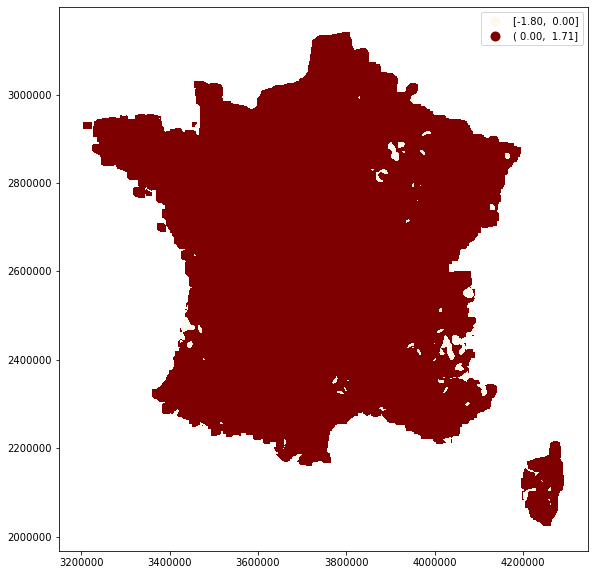

In [145]:
bins = [0]
scale_function2.plot('toto', scheme = 'User_Defined', classification_kwds={'bins':bins}, figsize=(10,10), legend=True, cmap='OrRd')

In [146]:
tutu = scale_function2[scale_function2.toto<0]

In [148]:
tutu.toto.describe()

count    2470.000000
mean       -0.190674
std         0.204378
min        -1.802556
25%        -0.262627
50%        -0.124942
75%        -0.052237
max        -0.000058
Name: toto, dtype: float64